Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy Score: 0.7988826815642458
Confusion Matrix:
[[92 13]
 [23 51]]


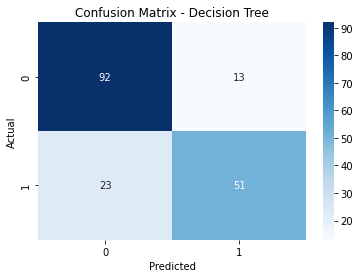

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Titanic dataset
titanic_df = pd.read_csv("C:/Users/USER/Documents/Machine_Learning_Algorithms/Datasets/titanic.csv")

# Preprocess the dataset
titanic_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'], drop_first=True)

# Split the dataset into features and target variable
X = titanic_df.drop(columns=['Survived'])
y = titanic_df['Survived']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid for GridSearchCV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': [3, 5, 7, 9],
          'min_samples_split': [2, 3, 4, 5],
          'min_samples_leaf': [1, 2, 3, 4, 5],
          'max_features': ['auto', 'sqrt', 'log2']}

# Define the GridSearchCV model
dt_gs = GridSearchCV(estimator=dt_model, param_grid=params, cv=5)

# Fit the GridSearchCV model on the training data
dt_gs.fit(X_train, y_train)

# Print the best hyperparameters
print(f"Best Hyperparameters: {dt_gs.best_params_}")

# Predict on the test data
y_pred = dt_gs.predict(X_test)

# Calculate the accuracy score
acc_score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc_score}")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print the classification report
cr = classification_report(y_test, y_pred)
print(f"Classification Report:\n{cr}")